<a href="https://colab.research.google.com/github/maparrar/captcha_solver/blob/master/Captcha_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [0]:
img = cv2.imread('JpegImage_VB_6.jpeg',0)
kernel = np.ones((5,5),np.uint8)

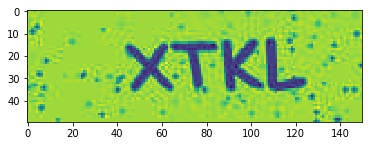

In [35]:
plt.imshow(img)

In [0]:
erosion = cv2.erode(img,kernel,iterations = 1)

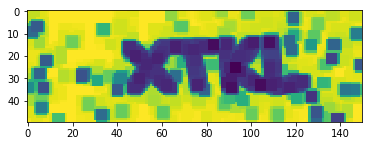

In [37]:
plt.imshow(erosion)

In [0]:
dilation = cv2.dilate(img,kernel,iterations = 1)

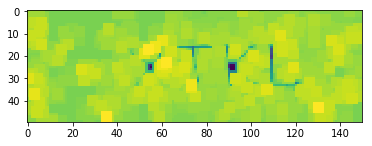

In [45]:
plt.imshow(dilation)

In [0]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

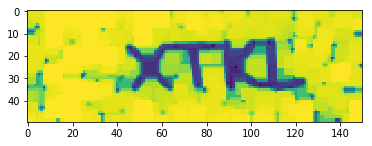

In [47]:
plt.imshow(opening)

In [0]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

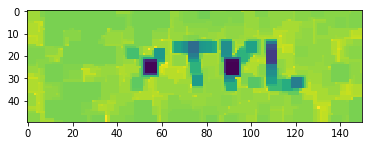

In [49]:
plt.imshow(closing)

In [0]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

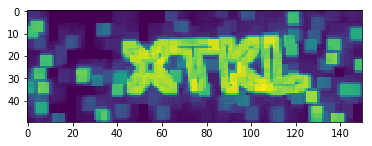

In [51]:
plt.imshow(gradient)

In [0]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

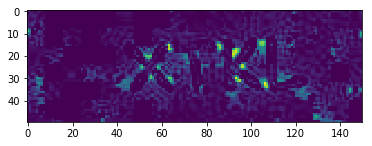

In [53]:
plt.imshow(tophat)

In [0]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

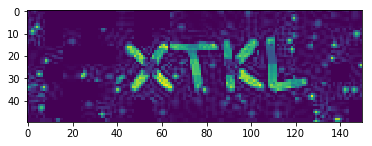

In [55]:
plt.imshow(blackhat)

In [58]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!sudo pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 6 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-

In [60]:
!tesseract --version

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


In [0]:
import pytesseract

In [69]:
# Define config parameters.
# '-l eng'  for using the English language
# '--oem 1' for using LSTM OCR Engine
config = ('-l eng --oem 1 --psm 3')

# Run tesseract OCR on image
text = pytesseract.image_to_string(img, config=config)
 
# Print recognized text
print(text)

2 ACTKL*


In [0]:
#==========================================================================0

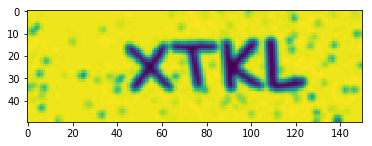

In [74]:
blurred = cv2.GaussianBlur(img, (5, 5), 0) # Remove noise

plt.imshow(blurred)

In [0]:
def edgedetect (channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)

    sobel[sobel > 255] = 255; # Some values seem to go above 255. However RGB channels has to be within 0-255